In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
baseDados = pd.read_csv("Startups+in+2021+end.csv")
baseDados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [17]:
# Renomear Colunas
baseDados.rename(
    columns= {
        'Unnamed: 0': 'Id',
        'Company': 'Companhia',
        'Valuation ($B)': 'Valor',
        'Date Joined': 'Data Entrada',
        'Country': 'Pais',
        'City': 'Cidade',
        'Industry': 'Industria',
        'Select investors': 'Investidores'
    }, inplace=True
)

baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                936 non-null    int64 
 1   Companhia         936 non-null    object
 2   Valor             936 non-null    object
 3   Data Entrada      936 non-null    object
 4   Pais              936 non-null    object
 5   Cidade            921 non-null    object
 6   Industria         936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [10]:
# Quantidade de campos nulos
baseDados.isnull().sum()

Id                   0
Companhia            0
Valor                0
Data Entrada         0
Pais                 0
Cidade              15
Industria            0
Select Investors     1
dtype: int64

In [19]:
# Quantidade de valores unicos
baseDados.nunique()

Id                  936
Companhia           935
Valor               192
Data Entrada        589
Pais                 47
Cidade              239
Industria            17
Select Investors    920
dtype: int64

In [20]:
# Quantidade de valores por industria
baseDados["Industria"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industria, dtype: int64

<BarContainer object of 17 artists>

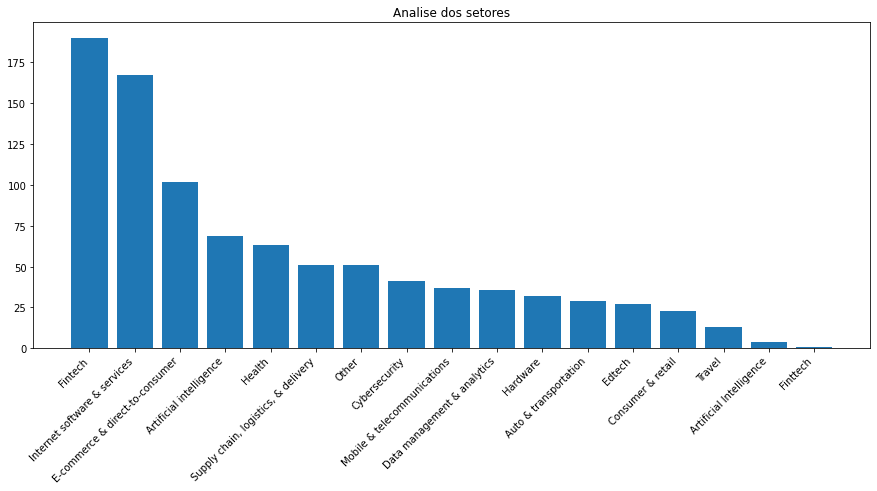

In [21]:
# Visão gráfica por industria
plt.figure(figsize=(15, 6))
plt.title("Analise dos setores")
plt.xticks(rotation=45, ha="right")
plt.bar(baseDados["Industria"].value_counts().index, baseDados["Industria"].value_counts())

In [23]:
analise = round( baseDados["Pais"].value_counts(normalize=True) * 100, 1)

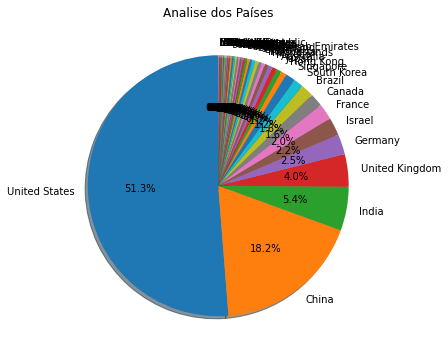

In [32]:
plt.figure(figsize=(10,6))
plt.title("Analise dos Países")
plt.pie(analise, labels=analise.index, shadow=True, startangle=90, autopct="%1.1f%%");

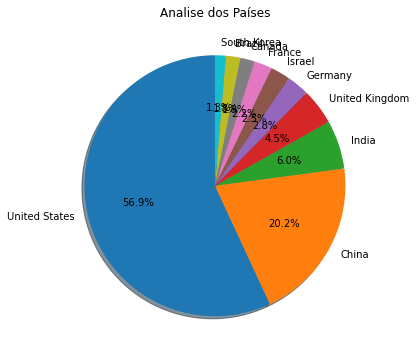

In [34]:
plt.figure(figsize=(10,6))
plt.title("Analise dos Países")
plt.pie(analise.head(10), labels=analise.index[0:10], shadow=True, startangle=90, autopct="%1.1f%%");

In [39]:
baseDados['Data Entrada'] = pd.to_datetime(baseDados['Data Entrada'])

In [42]:
# Extrair ano e mês
baseDados['Mes'] = pd.DatetimeIndex(baseDados['Data Entrada']).month
baseDados['Ano'] = pd.DatetimeIndex(baseDados['Data Entrada']).year

In [43]:
baseDados.head()

,Id,Companhia,Valor,Data Entrada,Pais,Cidade,Industria,Select Investors,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [49]:
analiseAgrupada = baseDados.groupby(by=['Pais', 'Ano', 'Mes', 'Companhia']).count()['Id'].reset_index()
analiseAgrupada

,Pais,Ano,Mes,Companhia,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [61]:
analiseAgrupada.loc[analiseAgrupada['Pais'] == 'Brazil']

,Pais,Ano,Mes,Companhia,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1
